In [1]:
import os 

import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

import TwoPUtils as tpu
import STX3KO_analyses as stx
from STX3KO_analyses import utilities as u

# shorthand for mouse names
# all session naming info in stx.ymaze_sess_deets
ko_mice = stx.ymaze_sess_deets.ko_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice


%matplotlib inline

%load_ext autoreload
%autoreload 2


/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Loading sessions

In [2]:
# wrapper method for looping load a single session
sess = u.load_single_day(ctrl_mice[2],5)

# factory method for loading from file
eg_path = os.path.join('/home/mplitt/YMazeSessPkls', ko_mice[2], '28_09_2020',"YMaze_LNovel_1.pkl" )
sess = stx.session.YMazeSession.from_file(eg_path)



{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/28_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/28_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


# Session information

In [3]:
print('trial info keys', sess.trial_info.keys())
#LR is left right (-1: left, 1: right)

# print available timeseries
print('aligned timeseries', sess.timeseries.keys())

print("cells: %d, timepoints: %d" % sess.timeseries['spks'].shape)

# print position binned timeseries
print('Position binned timeseries', sess.trial_matrices.keys())

print("trials: %d, position bins: %d, cells: %d" % sess.trial_matrices['spks'].shape)

# licks and speed are just trials x position
# bin_centers, bin_edges are spline values for spatial bins

trial info keys dict_keys(['block_number', 'LR'])
aligned timeseries dict_keys(['F', 'Fneu', 'spks', 'F_dff', 'F_dff_norm', 'spks_norm', 'licks', 'speed'])
cells: 936, timepoints: 38810
Position binned timeseries dict_keys(['F_dff', 'bin_edges', 'bin_centers', 'spks', 'F_dff_norm', 'spks_norm', 'licks', 'speed'])
trials: 102, position bins: 30, cells: 936


# Plot some place cells

In [4]:
# get the place cells
left_pcs = sess.place_cell_info['left']['masks']
right_pcs = sess.place_cell_info['right']['masks']

# calculate from scratch
# sess.place_cells_calc(Fkey='spks', lr_split=True, nperms=1000)

Text(0.5, 1.0, 'Left Trials (Right Trial Sort)')

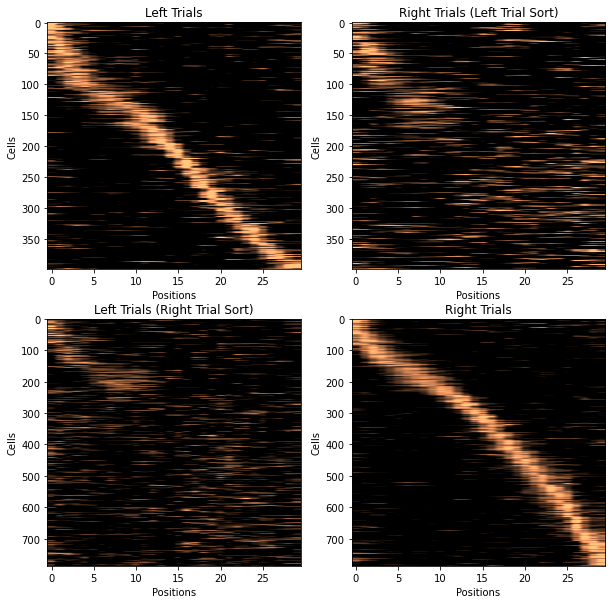

In [5]:
# plt the place cells
fig, ax = plt.subplots(2,2, figsize=[10,10])

# left trials
trial_mat = sess.trial_matrices['spks'][sess.trial_info['LR']==-1,:,:][:,:,left_pcs]
# sort by odd trials
sort_vec = np.argsort(np.argmax(np.nanmean(trial_mat[::2,:,:],axis=0), axis=0))
ax[0,0].imshow(sp.stats.zscore(np.nanmean(trial_mat[1::2,:,:],axis=0),axis=0)[:,sort_vec].T, aspect='auto', cmap='copper', vmin=0, vmax=3)
ax[0,0].set_ylabel('Cells')
ax[0,0].set_xlabel('Positions')
ax[0,0].set_title('Left Trials')
# right trials (left sort)
trial_mat = sess.trial_matrices['spks'][sess.trial_info['LR']==1,:,:][:,:,left_pcs]
ax[0,1].imshow(sp.stats.zscore(np.nanmean(trial_mat[1::2,:,:],axis=0),axis=0)[:,sort_vec].T, aspect='auto', cmap='copper', vmin=0, vmax=3)
ax[0,1].set_ylabel('Cells')
ax[0,1].set_xlabel('Positions')
ax[0,1].set_title('Right Trials (Left Trial Sort)')


#right 
trial_mat = sess.trial_matrices['spks'][sess.trial_info['LR']==1,:,:][:,:,right_pcs]
# sort by odd trials
sort_vec = np.argsort(np.argmax(np.nanmean(trial_mat[::2,:,:],axis=0), axis=0))
ax[1,1].imshow(sp.stats.zscore(np.nanmean(trial_mat[1::2,:,:],axis=0),axis=0)[:,sort_vec].T, aspect='auto', cmap='copper', vmin=0, vmax=3)
ax[1,1].set_ylabel('Cells')
ax[1,1].set_xlabel('Positions')
ax[1,1].set_title('Right Trials')


# left trials (right sort)
trial_mat = sess.trial_matrices['spks'][sess.trial_info['LR']==-1,:,:][:,:,right_pcs]
ax[1,0].imshow(sp.stats.zscore(np.nanmean(trial_mat[1::2,:,:],axis=0),axis=0)[:,sort_vec].T, aspect='auto', cmap='copper', vmin=0, vmax=3)
ax[1,0].set_ylabel('Cells')
ax[1,0].set_xlabel('Positions')
ax[1,0].set_title('Left Trials (Right Trial Sort)')


# Concatenate tracked cells acrosss days

In [ ]:
# load aligned sessions
concat_sess = u.single_mouse_concat_sessions(ctrl_mice[0],date_inds=np.arange(0,9))

29_11_2020 YMaze_LNovel
30_11_2020 YMaze_LNovel
01_12_2020 YMaze_LNovel
02_12_2020 YMaze_LNovel
03_12_2020 YMaze_LNovel
04_12_2020 YMaze_LNovel
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


In [ ]:
print("number of days %d" % (concat_sess.trial_info['sess_num'][-1]+1))
print("trials: %d, positions: %d, tracked cells: %d" % concat_sess.trial_matrices['spks'].shape)


In [ ]:
print("trial info values", concat_sess.trial_info.keys())
print("number of trials %d" % concat_sess.trial_info['LR'].shape[0])

# sess_num is day of experiment (0-indexed)
print("timeseries keys", concat_sess.timeseries.keys())
print("concatenated timeseries shape [cells x timepoints]  [%d, %d] =" % concat_sess.timeseries['spks'].shape)




In [ ]:
# plot some matched place cells
# left trial key is -1, right trial key is 1
print("place cell masks shape, days: %d x cells: %d" % concat_sess.place_cell_info[-1]['masks'].shape)

# mask of cells that are place cells on any day
any_pc_mask = {k:(concat_sess.place_cell_info[k]['masks']*1).sum(axis=0)>0 for k in (-1,1)}

# mask of cells that are place cell on all days
all_pc_mask = {k:(concat_sess.place_cell_info[k]['masks']*1).prod(axis=0)>0 for k in (-1,1)}